# 计算机网络体系结构第二次作业

作业要求：

> 1. 推导杜邦分析公式：ROE = 净利润率 x 总资产周转率 x 权益乘数，并简要分析宏观经济放缓对于 ROE 的影响。
> 2. 因为假的东西难以长久，看财报最好多看几年。1）利用 akshare 库获取上市公司的财务报表数据（代码参考附录 1），计算每只股票在 2021 年至 2023 年期间的 ROE（由于 akshare 没有给出归母净利润，这里假设净利润 = 归母净利润）。2）希望对同一板块的公司进行 ROE 的横向比较。
> 3. 在 2 的基础上，针对于 ROE 最高的公司，根据其某一年，如 2023 年的年度报表，进行杜邦分析。（markdown 画图可参考附录 2）

## 理论推导

### 杜邦分析公式

杜邦分析公式是一个用于分解公司 ROE 的公式，它将 ROE 分解为三个部分：净利润率、总资产周转率和权益乘数。具体推导如下：

$$
\begin{alignat*}{3}
    \text{净利润率}    & \coloneqq \frac{\text{归母净利润}}{\text{营业收入}} \tag{净利润率} \\
    \text{总资产周转率} & \coloneqq \frac{\text{营业收入}}{\text{平均总资产}} \tag{总资产周转率} \\
    \text{权益乘数}    & \coloneqq \frac{1}{1 - 资产负债率} \tag{权益乘数} \\
                      & = \frac{1}{1 - \frac{平均总负债}{平均总资产}} \\
                      & = \frac{平均总资产}{平均总资产 - 平均总负债} \\
                      & = \frac{\text{平均总资产}}{\text{净资产}} \\
    ROE               & \coloneqq \frac{\text{归母净利润}}{\text{净资产}} \tag{净资产收益率} \\
                      & = \frac{\text{归母净利润}}{\text{营业收入}} \times \frac{\text{营业收入}}{\text{净资产}} \\
                      & = \frac{\text{归母净利润}}{\text{营业收入}} \times \frac{\text{营业收入}}{\text{平均总资产}} \times \frac{\text{平均总资产}}{\text{净资产}} \\
                      & = \text{净利润率} \times \text{总资产周转率} \times \text{权益乘数}
\end{alignat*}
$$

## 实验设置


## 实验原理、实现、结果与分析


In [129]:
from typing import Callable
from pylab import mpl
from matplotlib import pyplot as plt
import akshare as ak
import os
import os.path as path
import pandas as pd
import pathlib as pl


# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["Songti SC"]
mpl.rcParams["axes.unicode_minus"] = False


class DataLoader:
    """
    Load data from akshare and save it to local file.
    """
    stock_zcfz_em_df: pd.DataFrame
    stock_lrb_em_df: pd.DataFrame
    stock_xjll_em_df: pd.DataFrame

    def __init__(self, date: str):
        self.load_data(date)

    @staticmethod
    def load_df(p: pl.Path, getter: Callable[[], pd.DataFrame]):
        '''
        Load DataFrame from local file, if the file does not exist, call getter to get the data.
        '''
        if not path.exists(p):
            df = getter()
            df.set_index("股票代码", inplace=True)
            df.to_pickle(p)
        # 如果我们不使用pd.read_json，而是直接使用pd.read_csv，会导致数据类型不一致
        # 例如，有的列是int，有的列是float
        return pd.read_pickle(p)

    def load_data(self, date: str):
        DIR = pl.Path("data")
        os.makedirs(DIR, exist_ok=True)
        self.stock_zcfz_em_df = self.load_df(
            DIR / f"stock_zcfz_em-{date}.pkl",
            lambda: ak.stock_zcfz_em(date=date)
        )
        self.stock_lrb_em_df = self.load_df(
            DIR / f"stock_lrb_em-{date}.pkl",
            lambda: ak.stock_lrb_em(date=date)
        )
        self.stock_xjll_em_df = self.load_df(
            DIR / f"stock_xjll_em-{date}.pkl",
            lambda: ak.stock_xjll_em(date=date)
        )

In [130]:
DATES = ["20201231", "20211231", "20221231", "20231231"]
data = {date: DataLoader(date) for date in DATES}

start = data["20201231"]
following = [data[d] for d in DATES[1:]]
end = data["20231231"]
print(start.stock_zcfz_em_df.columns)
print(start.stock_lrb_em_df.columns)
print(start.stock_xjll_em_df.columns)

  0%|          | 0/11 [00:00<?, ?it/s]0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
                                               

Index(['序号', '股票简称', '资产-货币资金', '资产-应收账款', '资产-存货', '资产-总资产', '资产-总资产同比',
       '负债-应付账款', '负债-预收账款', '负债-总负债', '负债-总负债同比', '资产负债率', '股东权益合计', '公告日期'],
      dtype='object')
Index(['序号', '股票简称', '净利润', '净利润同比', '营业总收入', '营业总收入同比', '营业总支出-营业支出',
       '营业总支出-销售费用', '营业总支出-管理费用', '营业总支出-财务费用', '营业总支出-营业总支出', '营业利润', '利润总额',
       '公告日期'],
      dtype='object')
Index(['序号', '股票简称', '净现金流-净现金流', '净现金流-同比增长', '经营性现金流-现金流量净额',
       '经营性现金流-净现金流占比', '投资性现金流-现金流量净额', '投资性现金流-净现金流占比', '融资性现金流-现金流量净额',
       '融资性现金流-净现金流占比', '公告日期'],
      dtype='object')


In [131]:
codes = set(start.stock_zcfz_em_df.index.array)
for date in DATES[1:]:
    codes = codes.intersection(set(data[date].stock_zcfz_em_df.index.array))
list_codes = [*codes]
list_codes.sort()
print(len(list_codes))

2425


In [132]:
# 计算指标

# 1. 营业净利润率

for following in following:
    start.stock_lrb_em_df.loc[list_codes,
                              '净利润'] += following.stock_lrb_em_df.loc[list_codes, '净利润']
    start.stock_lrb_em_df.loc[list_codes,
                              '营业总收入'] += following.stock_lrb_em_df.loc[list_codes, '营业总收入']

result = pd.DataFrame({
    '股票代码': list_codes,
    '股票简称': start.stock_zcfz_em_df.loc[list_codes, '股票简称'],
    '归母净利润':  end.stock_lrb_em_df.loc[list_codes, '净利润']-start.stock_lrb_em_df.loc[list_codes, '净利润'],
    '营业收入': end.stock_lrb_em_df.loc[list_codes, '营业总收入']-start.stock_lrb_em_df.loc[list_codes, '营业总收入'],
    '平均总资产': (start.stock_zcfz_em_df.loc[list_codes, '资产-总资产'] +
              end.stock_zcfz_em_df.loc[list_codes, '资产-总资产']) / 2,
    '平均总负债': (start.stock_zcfz_em_df.loc[list_codes, '负债-总负债'] +
              end.stock_zcfz_em_df.loc[list_codes, '负债-总负债']) / 2,
})
result.set_index('股票代码', inplace=True)
result['营业净利润率'] = result['归母净利润'] / result['营业收入']
result['总资产周转率'] = result['营业收入'] / result['平均总资产']
result['资产负债率'] = result['平均总负债'] / result['平均总资产']
result['净资产'] = result['平均总资产'] - result['平均总负债']
result['权益乘数'] = result['平均总资产'] / result['净资产']
result['净资产收益率'] = result['归母净利润'] / result['净资产']

In [133]:
# 去除净资产为负的股票
print(result[result.loc[:, '净资产'] <= 0])
result = result[result.loc[:, '净资产'] > 0]

        股票简称         归母净利润          营业收入         平均总资产         平均总负债  \
股票代码                                                                   
000523  红棉股份  4.791017e+09 -6.859956e+08  3.307607e+09  4.154008e+09   
002356  赫美集团  4.567942e+08 -3.015513e+08  9.658484e+08  2.167062e+09   
002766  索菱股份  1.337921e+09  2.334306e+08  1.713844e+09  1.742275e+09   
600518  ST康美  3.118735e+10 -5.379918e+08  2.380325e+10  2.546784e+10   
600734  ST实达  6.283346e+08 -8.159937e+08  1.477955e+09  1.863208e+09   
688520  神州细胞  3.164863e+08  1.887021e+09  2.191024e+09  2.199749e+09   

           营业净利润率    总资产周转率     资产负债率           净资产        权益乘数     净资产收益率  
股票代码                                                                        
000523  -6.984034 -0.207399  1.255895 -8.464008e+08   -3.907850  -5.660458  
002356  -1.514815 -0.312214  2.243687 -1.201213e+09   -0.804061  -0.380277  
002766   5.731557  0.136203  1.016589 -2.843144e+07  -60.279875 -47.057796  
600518 -57.969940 -0.022602  1.069931 

In [134]:
result.describe()

,归母净利润,营业收入,平均总资产,平均总负债,营业净利润率,总资产周转率,资产负债率,净资产,权益乘数,净资产收益率
count,2.419000e+03,2.416000e+03,2.419000e+03,2.419000e+03,2416.000000,2416.000000,2419.000000,2.419000e+03,2419.000000,2419.000000
mean,3.915769e+08,4.674287e+09,1.282153e+11,1.084856e+11,0.048412,0.172494,0.411782,1.972968e+10,2.124159,0.023396
std,4.941599e+09,4.070672e+10,1.499238e+12,1.373100e+12,8.443035,0.302294,0.203841,1.351681e+11,1.692289,0.244927
min,-5.743400e+10,-3.045260e+11,2.167385e+08,2.224570e+07,-229.313000,-1.975453,0.027310,1.744578e+07,1.028077,-0.992041
25%,-8.234313e+07,5.671319e+07,1.896803e+09,5.448531e+08,-0.046644,0.013998,0.245633,1.207187e+09,1.325615,-0.034108
50%,2.185901e+07,4.699045e+08,4.305100e+09,1.557358e+09,0.079412,0.129422,0.396788,2.475270e+09,1.657792,0.010732
75%,2.082602e+08,1.927381e+09,1.278059e+10,5.861900e+09,0.260995,0.281168,0.554815,6.570446e+09,2.246257,0.056451
max,1.421420e+11,1.107491e+12,3.902107e+13,3.567802e+13,182.765654,3.062460,0.957581,3.343052e+12,23.574134,7.540655


In [135]:
print(pd.DataFrame.from_dict({
    '开始时间': start.stock_zcfz_em_df.资产负债率.describe(),
    '结束时间': end.stock_zcfz_em_df.资产负债率.describe()
}))

               开始时间         结束时间
count   5170.000000  2425.000000
mean      45.782102    40.941066
std      248.432711    21.266721
min        1.306203     2.107879
25%       25.746219    23.739977
50%       40.902024    39.638593
75%       56.628315    55.932779
max    17834.547318   122.284584


In [136]:
print(pd.DataFrame.from_dict({
    '开始时间': start.stock_lrb_em_df['净利润'].describe(),
    '结束时间': end.stock_lrb_em_df['净利润'].describe()
}))

               开始时间          结束时间
count  5.170000e+03  2.425000e+03
mean   8.395560e+08  1.813387e+09
std    8.313098e+09  1.459529e+10
min   -6.400331e+10 -8.168000e+09
25%    4.776486e+07  4.762086e+07
50%    1.116375e+08  1.595813e+08
75%    3.285773e+08  5.261305e+08
max    3.159060e+11  3.639930e+11


<Axes: xlabel='股票代码'>

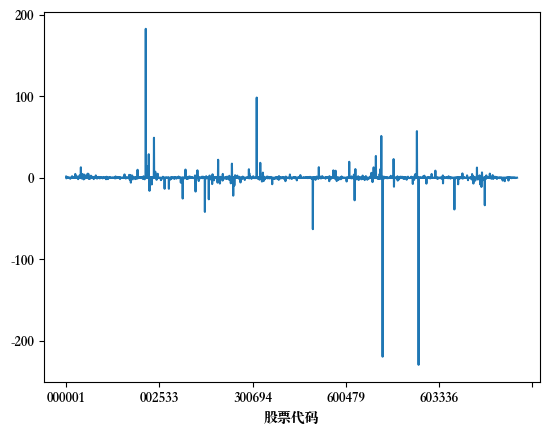

In [137]:
result.loc[:, '营业净利润率'].plot()

<Axes: xlabel='股票代码'>

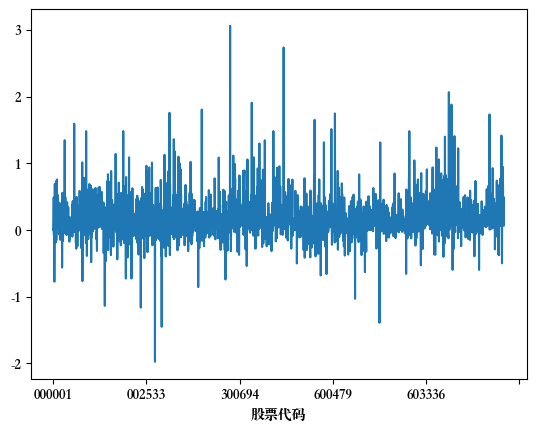

In [138]:
result.loc[:, '总资产周转率'].plot()

<Axes: xlabel='股票代码'>

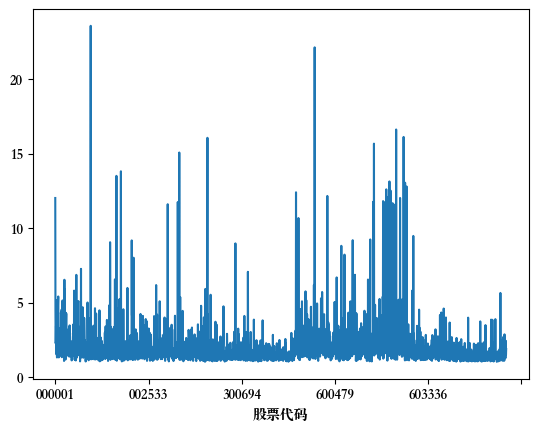

In [139]:
result.loc[:, '权益乘数'].plot()

<Axes: xlabel='股票代码'>

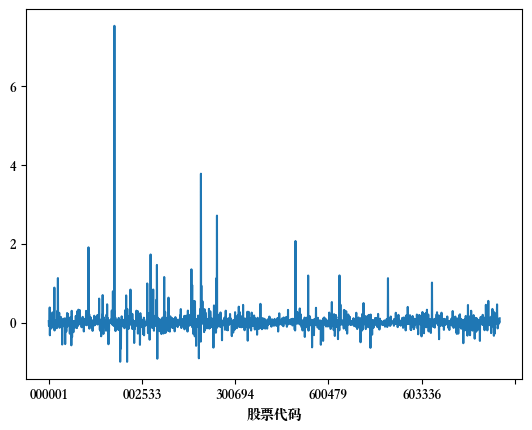

In [140]:
result.loc[:, '净资产收益率'].plot()

## 实验总结与自评分


## 感谢和收获
